Manually calculated Pearson's r for rape and murder rates: 0.56358
scipy.stats person r = 0.56358
P = 2.0308258661568282e-05

The correlation between murder and rape arrest rates was statistically significant.


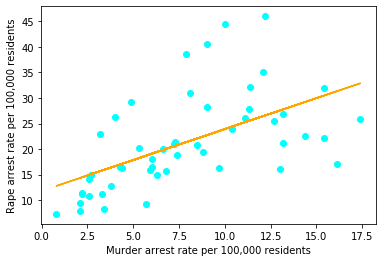

R-squared = 0.32


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math
import scipy.stats

# importing and subsetting the data

# data obtained from 'https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/USArrests.csv'

# documentation for data: 'https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests'

dframe = pd.read_csv('USArrests.csv')

dframe.rename(columns = {'Unnamed: 0':'State'}, inplace = True) 

state = dframe['State']
murder = dframe['Murder']
assault = dframe['Assault']
urbpop = dframe['UrbanPop']
rape = dframe['Rape']

# calculating the mean of the murder and rape arrest rates

murder_mean = stats.mean(murder)
rape_mean = stats.mean(rape)

# calculating the sum of the products for murder arrest rate and rape arrest rate

murder_dev = []
for i in murder:
    murder_dev.append(i-murder_mean)
    
rape_dev = []
for i in rape:
    rape_dev.append(i-rape_mean)
    
product = []

count = 0
if len(murder) == len(rape):
    for i in murder_dev:
        product.append(i*rape_dev[count])
        count = count + 1
        
SP = sum(product)

# calculating the sum of squares for murder arrest rate and rape arrest rate

SS_murder = []
for i in murder_dev:
    SS_murder.append(i**2)
    
SS_murder = sum(SS_murder)

SS_rape = []
for i in rape_dev:
    SS_rape.append(i**2)
    
SS_rape = sum(SS_rape)

# calculating pearson's r for murder arrest rate and rape arrest rate
r = SP/math.sqrt(SS_murder*SS_rape)

print("Manually calculated Pearson's r for rape and murder rates:", round(r,5))

# checking result with scipy.stats

result = scipy.stats.pearsonr(murder, rape)

print('scipy.stats person r =', round(result[0],5))
print('P =', result[1])
print()

if result[1] <= 0.5:
    print('The correlation between murder and rape arrest rates was statistically significant.')
    
else:
    print('The correlation between murder and rape arrest rates was not statistically significant.')
    
# plotting the data

plt.scatter(murder, rape, color = 'cyan')
plt.xlabel("Murder arrest rate per 100,000 residents")
plt.ylabel("Rape arrest rate per 100,000 residents")

# calculating and plotting the linear regression equation for murder arrest rate and rape arrest rate

b = SP/SS_murder
intercept = rape_mean - b*murder_mean

yhat = murder*b + intercept

plt.plot(murder, yhat, color = 'orange')
plt.show()

print('R-squared =', round(r**2,2))